# SRO Playground

This notebook is not part of the CogPonder. It is a playground to work with the SRO dataset.

In [137]:
%reload_ext autoreload
%autoreload 3

from src.cogponder.datasets import StroopSRODataset, CogPonderDataModule
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sns.set('notebook'); sns.set_style('ticks')

# datamodule = CogPonderDataModule(StroopSRODataset(100))

RESPONSE_STEP_INTERVAL = 10  # ms

dataset = StroopSRODataset(response_step_interval=RESPONSE_STEP_INTERVAL)

X, trial_types, is_corrects, responses, response_steps = dataset[:]

In [138]:
# plot response times and stroop effect for all subjects

# for s in X[conditions == 0]:
#     plt.plot(s, color='blue', alpha=0.1)
# response_steps[trial_types == 0].shape

cong_rts = np.where(trial_types == 1, response_steps, np.nan)
incong_rts = np.where(trial_types == 0, response_steps, np.nan)

cong_corrects = np.where(trial_types == 1, is_corrects, np.nan)
incong_corrects = np.where(trial_types == 0, is_corrects, np.nan)

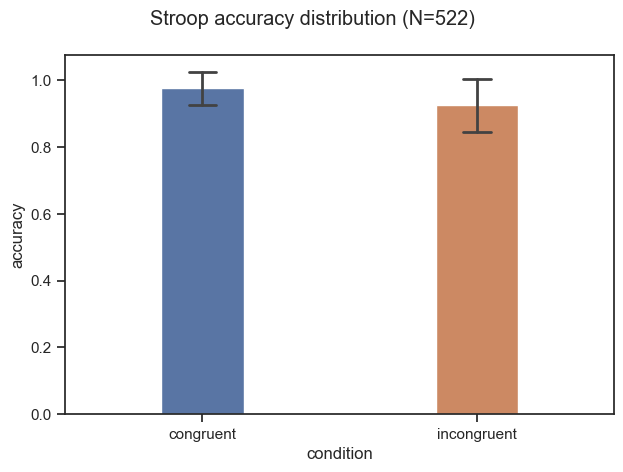

In [143]:
# plot accuracy for all subjects

plot_data = pd.DataFrame({
    'congruent': np.nanmean(cong_corrects, axis=1),
    'incongruent': np.nanmean(incong_corrects, axis=1),
})


# plot_data.mean()
plot_data = plot_data.melt(var_name='condition', value_name='accuracy')
# sns.displot(plot_data,
#             kind='hist', kde=True, height=4)
sns.barplot(data=plot_data, x='condition', y='accuracy',
            width=.3,
            errorbar='sd', capsize=.1, errwidth=2)
plt.suptitle('Stroop accuracy distribution (N=522)')
plt.tight_layout()
plt.savefig('outputs/figures/sro_stroop_accuracy.png', bbox_inches='tight', dpi=300)
plt.show()

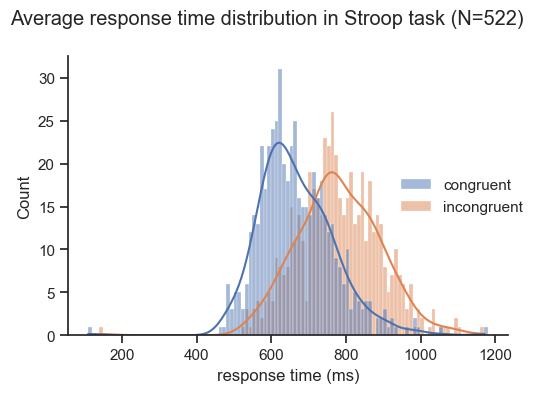

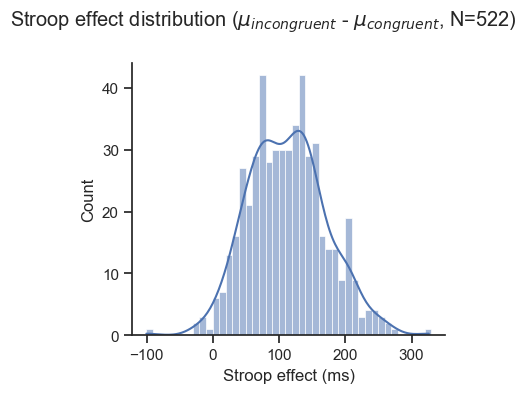

In [144]:
# plot response times and stroop effect for all subjects

plot_data = pd.DataFrame({
    'congruent': np.nanmean(cong_rts, axis=1),
    'incongruent': np.nanmean(incong_rts, axis=1),
})
plot_data['stroop_effect'] = plot_data['incongruent'] - plot_data['congruent']

plot_data = plot_data * RESPONSE_STEP_INTERVAL  # step -> milliseconds

# response time distributions
sns.displot(plot_data.drop(columns=['stroop_effect']),
            height=4,
            kind='hist', binwidth=RESPONSE_STEP_INTERVAL, kde=True, kde_kws={'cut': 0})

plt.xlabel('response time (ms)')
plt.suptitle('Average response time distribution in Stroop task (N=522)')
plt.tight_layout()
plt.savefig('outputs/figures/sro_response_times.png', bbox_inches='tight', dpi=300)
plt.show()

# Stroop effect distribution
sns.displot(plot_data['stroop_effect'],
            height=4,
            kind='hist', binwidth=RESPONSE_STEP_INTERVAL, kde=True, kde_kws={'cut': 0})

plt.xlabel('Stroop effect (ms)')
plt.suptitle('Stroop effect distribution '
             '($\mu_{incongruent}$ - $\mu_{congruent}$, N=522)')
plt.tight_layout()
plt.savefig('outputs/figures/sro_stroop_effect.png', bbox_inches='tight', dpi=300)
plt.show()


350.0


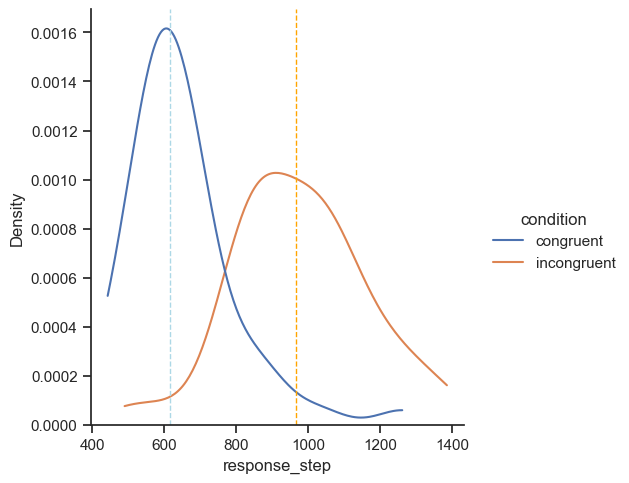

In [125]:
# plot response time in one subject

plot_data = pd.DataFrame({
    'condition': trial_types[202],
    'response_step': response_steps[202],
})

# conditions: 0 = incongruent, 1 = congruent
plot_data['condition'] = plot_data['condition'].map({0: 'incongruent', 1: 'congruent'})

rt_medians = plot_data.groupby('condition').median()
stroop_effect = rt_medians['response_step'].diff()[1]

print(stroop_effect)
sns.displot(plot_data,
            x='response_step', hue='condition',
            kind='kde', cut=0)

plt.axvline(rt_medians.loc['congruent'].item(), color='lightblue', lw=1, ls='--')
plt.axvline(rt_medians.loc['incongruent'].item(), color='orange', lw=1, ls='--')

plt.show()

In [ ]:
data = pd.read_csv('data/Self_Regulation_Ontology/adaptive_n_back.csv.gz', index_col=0)
data = data.query('worker_id == worker_id.unique()[-1] and exp_stage == "adaptive"')

data_s521_2back = data.query('load == 2').sort_values(['block_num', 'trial_num'])
data_s521_2back

In [ ]:
stimuli = data_s521_2back.stim.str.upper()
rt = data_s521_2back.rt.values
responses = data_s521_2back.key_press
is_corrects = data_s521_2back.correct
targets = data_s521_2back.target
# sns.kdeplot(rt)
is_corrects